Wenn POS:
    Finde längsten Substring aus TK-Vokabular (Stämme)
    Präfix:
        Rekursiv längste Substrings bis komplett segmentiert
    Suffix:
        Rekursiv längste Substrings bis komplett segmentiert
    Rest:
        Aus atomarem Vokabular

LOAD FUNCTIONAL / LEXEMIC VOCAB

In [1]:
import collections as cl
from more_itertools import subslices

In [2]:
with open("../new_tokenizer/lex_vocab_raw.txt", encoding="utf8", mode="r") as lv:
    lm_raw = lv.read().split("\n")
    lv.close()

with open("../new_tokenizer/fun_vocab_raw.txt", encoding="utf8", mode="r") as fv:
    fm_raw = fv.read().split("\n")
    fv.close()

156520

INITIALIZE HASHABLES WITH RELATIVE WEIGHTS FOR EACH MORPHEME

In [3]:
fm_clean = [i for i in fm_raw if i != ""]  # select non-empty morphemes
fm_ncount = cl.Counter(fm_clean).most_common()
n_o_fm = len(fm_clean)
fm_rel = {k: v / n_o_fm if len(k) > 1 else 0 for k, v in fm_ncount}  # unary morphemes get no weight

lm_clean = [i for i in lm_raw if len(i) > 1]  # select only morphemes longer than 1 character
lm_ncount = cl.Counter(lm_clean).most_common()
n_o_lm = len(lm_clean)
lm_rel = {k: v / n_o_lm if len(k) > 1 else 0 for k, v in lm_ncount}  # unary morphemes get no weight
lm_rel

{'schrei': 0.0003197953309881676,
 'schnei': 0.0002942117045091142,
 'ei': 0.00028141989126958747,
 'au': 0.00028141989126958747,
 'rei': 0.00023025263831148065,
 'schie': 0.00023025263831148065,
 'lie': 0.00019187719859290055,
 'lau': 0.00019187719859290055,
 'wuch': 0.00019187719859290055,
 'wach': 0.00017908538535337383,
 'schla': 0.00017908538535337383,
 'ar': 0.00017908538535337383,
 'rau': 0.00017908538535337383,
 'wir': 0.00016629357211384713,
 'schau': 0.00016629357211384713,
 'stür': 0.00016629357211384713,
 'al': 0.00016629357211384713,
 'ie': 0.00016629357211384713,
 'grei': 0.00015350175887432043,
 'hau': 0.00015350175887432043,
 'schlie': 0.00015350175887432043,
 'blie': 0.00015350175887432043,
 'strei': 0.00015350175887432043,
 'blei': 0.00015350175887432043,
 'brau': 0.00015350175887432043,
 'in': 0.00015350175887432043,
 'wand': 0.00014070994563479373,
 'frühstück': 0.00014070994563479373,
 'flie': 0.00014070994563479373,
 'bekomm': 0.00014070994563479373,
 'schlaf': 0.

In [23]:
token = "überschreiben"

In [54]:
[0,lm_rel["ge"],lm_rel["geh"],lm_rel["gehe"]]

[0, 2.5583626479053406e-05, 6.395906619763352e-05, 1.2791813239526703e-05]

In [8]:
print((fm_rel["üb"]+ fm_rel["er"]+lm_rel["schreib"]+fm_rel["en"]) > (fm_rel["über"]+lm_rel["schreib"]+fm_rel["en"]))
print((lm_rel["geh"]+fm_rel["en"]) > (fm_rel["ge"]+0+fm_rel["en"]))

True
False


In [34]:
[i for i in fm_rel if i.startswith("ü")]

['über', 'üb', 'übe', 'ü']

In [35]:
[i for i in fm_rel if i.startswith("s")]

['st', 's', 'sch', 'ss', 'sc']

COMBINE BOTH LEX AND FUN

In [26]:
with open("../new_tokenizer/lex_vocab_raw.txt", encoding="utf8", mode="r") as lv:
    lm_raw = lv.read().split("\n")
    lv.close()

with open("../new_tokenizer/fun_vocab_raw.txt", encoding="utf8", mode="r") as fv:
    fm_raw = fv.read().split("\n")
    fv.close()

In [27]:
token = "beschreiben"

In [28]:
fm_raw_clean = [i for i in fm_raw if i != ""]

In [29]:
lm_raw_clean = [i for i in lm_raw if i != ""]

In [30]:
lmfm = lm_raw_clean+fm_raw_clean

In [31]:
import collections as cl
lm_clean = [i for i in lmfm]
lm_ncount = cl.Counter(lm_clean).most_common()
n_o_lm = len(lm_clean)
lmfm = {k: v / n_o_lm if len(k) > 1 else 0 for k, v in lm_ncount}  # unary morphemes get no weight


In [32]:
len(lmfm)

43700

In [33]:
print((lmfm["üb"]+ lmfm["er"]+lmfm["schreib"]+lmfm["en"]) > (lmfm["über"]+lmfm["schreib"]+lmfm["en"]))
print((lmfm["geh"]+lmfm["en"]) > (lmfm["ge"]+0+lmfm["en"]))

True
False


In [34]:
tv = [i for i in lmfm if i in token]  # morpheme vocab for token (functional + lexical)

if morphem startswith:
    merke kosten
    finde strip, return morphem + restword

In [132]:
tk = "schwimmen"
subvocab = [i for i in lmfm if i in tk]
segmentations = []

In [133]:

def segmenter(token, segments=None, start=0, stop=int):
    if segments is None:
        segments = []
    if start == stop:
        segmentations.append(segments)
    else:
        new_morpheme = [i for i in subvocab if token.startswith(i) and len(i)>1]
        for m in new_morpheme:
            rest = token[len(m):]
            start += len(m)
            segments.append(m)
            segmenter(token=rest, segments=segments.copy(), start=start, stop=stop)
            segments = segments[:-1]
            start -= len(m)

In [134]:
import timeit


gfs = timeit.default_timer()

segs = segmenter(token=tk, stop=len(tk))

asd = timeit.default_timer()

print('Time: ', asd - gfs)


Time:  0.00010239100083708763


In [135]:
for i in segmentations:
    print(i)

['sch', 'wi', 'mm', 'en']
['sch', 'wimm', 'en']
['schwimm', 'en']
['schwim', 'men']
['schwi', 'mm', 'en']
['schw', 'imm', 'en']
['schw', 'im', 'men']


In [131]:
import numpy as np

In [136]:
ws = dict()  # weighted segmentations
tk = "schwimmen"
len_tk = len(tk)
for s in segmentations:
    # ws[sum([lmfm[w] for w in s])/len(s)] = rel freqs / token length
    coverage = [len(i)/len_tk for i in s]  #  how much % of the word is covered by this morpheme
    morpheme_length = [len(i) for i in s]  #  how long is each morpheme
    rel_freq = [lmfm[i] for i in s]  #  relative frequency of the morpheme in the vocab
    n_o_segs = [len(s) for i in s]
    #cover_rf = sum([i*j for i,j in zip(rel_freq, morpheme_length)])

    #lex_bias = sum([cov*mlen for cov, mlen in zip(coverage, morpheme_length)])
    lex_bias = sum([(np.tanh(mlen) / nsegs) for mlen, nsegs, freq in zip(morpheme_length, n_o_segs, rel_freq)])

    ws[lex_bias] = s
ws[max(ws.keys())]

['schwim', 'men']

True

In [21]:
import numpy as np

In [187]:
np.tanh([len(i) for i in lmfm])

7.0

In [58]:
from scipy import stats as stats
from matplotlib import pyplot as pp
import numpy as np

In [102]:
rfs = [lmfm[i] for i in lmfm.keys() if lmfm[i] != 0]
unis = list(set(rfs))
unis.sort()

zs = stats.zscore(unis)

scale = unis
umean = np.mean(scale)
umed = np.median(scale)
kurt = stats.kurtosis(scale)

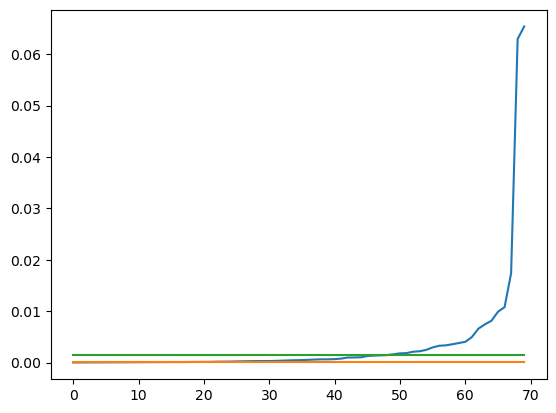

In [128]:
qq = np.quantile(scale, q=[0.05, 0.7])
pp.plot(scale)
pp.plot([qq[0] for i in scale])
pp.plot([qq[1] for i in scale])


In [129]:
lexemes = {k:lmfm[k] for k in lmfm if qq[0]<lmfm[k]<qq[1]}
lexemes

{'we': 0.001436974703042458,
 'um': 0.001385284965522945,
 'sch': 0.0013491021492592862,
 'über': 0.0012612295954761142,
 'ck': 0.0010131188553824523,
 'lt': 0.0009821050128707447,
 'ss': 0.0009665980916148907,
 'rte': 0.0007598391415368393,
 'zur': 0.0006564596664978135,
 'ent': 0.0006202768502341545,
 'vor': 0.0006151078764822033,
 'ng': 0.0005789250602185442,
 'aus': 0.0005220663489470801,
 'da': 0.00047037661142756716,
 'mm': 0.0004393627689158594,
 'eb': 0.0004393627689158594,
 'nd': 0.00040834892640415174,
 'nach': 0.00036182816263659014,
 'na': 0.00032047637262097985,
 'tz': 0.0002894625301092721,
 've': 0.0002894625301092721,
 'vo': 0.0002842935563573208,
 'durch': 0.00027912458260536955,
 'zus': 0.0002636176613495157,
 'erte': 0.00023777279258975923,
 'he': 0.00021192792383000278,
 'rst': 0.00021192792383000278,
 'weg': 0.00018091408131829507,
 'eh': 0.00017057613381439248,
 'wei': 0.00016023818631048992,
 'ei': 0.00016023818631048992,
 'schrei': 0.0001292243437987822,
 'schne

In [122]:
for i in lexemes:
    if len(i) > 7:
        print(i)

frühstück
wirtschafte
geschrieb
geschwomm
geschlag
misstrau
kleister
dolmetsch
ratschlag
dressier
sprenkel
meliorier
wurschtel
kalkulier
lizitier
laborier
indizier
konsumier
geschmiss
schleuder
spachtel
scherbel
chauffier
errammel
schwäger
erkrümel
erprügel
schwichtig
schimmel
glückwünsch
schaukel
strubbel
geschoss
geschnitt
erifizier
gesproch
errichte
schluder
schrumpel
schmurgel
schlimmer
erkleiner
schnörkel
inrichte
pflichte
ernichte
schwinde
erknitter
schwende
schacher
wirtschaf
galoppier
schrotte
schachtel
schnarch
schuldig
konterfei
schlüssel
anschlag
hätschel
knautsch
erpulver
spekulier
geschloss
inarbeite
gewaltig
rückstreb
weltlich
vierfach
schlagnahm
einsteck
leumunde
klausulier
weiblich
rückbesinn
schnüffel
heimlich
xplodier
überback
neunfach
schüchter
schachte
dinglich
zweifach
erstrahl
achtfach
erkrumpel
sachlich
niedlich
flüchtig
schriftlich
fünffach
dreifach
quacksalb
staatlich
westlich
menschlich
unterdrück
rückwünsch
vielfach
ausschau
schleier
überkomm
weichlich
notzüc

TRY BERT TOKENIZATION

1) format own vocab and add to pretrained tokenize via tokenizer.add_tokens
später: separat ein vocab als weighted dict in dem lexeme (zipf graph slicen, siehe oben) high weight sind
2) über satz gehen und verben finden: verben mit eigenem tokenizer (wenn stem in token, aber: vocab muss überreinstimmen) segmentieren: satz ohne verben an großen pre_trained weitergeben: verben wieder einfügen
3) encoded

In [4]:
import transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")
# tokenizer.add_tokens(HIER BEIDE SLICES: set(lex+fun))

In [79]:
sample = 'Ich möchte gerne verbessern wie du segmentierst'
encoding = tokenizer.encode(sample)
print(encoding)
print(tokenizer.convert_ids_to_tokens(encoding))

[3, 1671, 5513, 6812, 11866, 246, 4547, 4893, 26908, 3758, 5523, 26901, 4]
['[CLS]', 'Ich', 'möchte', 'gerne', 'verbessern', 'wie', 'du', 'se', '##g', '##ment', '##iers', '##t', '[SEP]']


In [105]:
# SPLIT SENTENCE TO TOKENIZE INTO LEX TOKENS (-> to own tokenizer) AND REST SENTENCE (-> pass on to pretrained)
sentence = 'Ich möchte gerne verbessern, wie du segmentierst'
tokenizer.

('Ich möchte gerne verbessern, wie du segmentierst', {})

In [87]:
from HanTa import HanoverTagger as ht

tagger = ht.HanoverTagger('morphmodel_ger.pgz')

In [126]:
verbs = []
for i in sentence.split(" "):
    if tagger.analyze(i)[1].startswith("V"):
        verbs.append(i)
tagger.tag_sent(sentence.split(" "))

[('Ich', 'ich', 'PPER'),
 ('möchte', 'möchten', 'VM(FIN)'),
 ('gerne', 'gerne', 'ADV'),
 ('verbessern,', 'Verbessern,', 'FM'),
 ('wie', 'wie', 'PWAV'),
 ('du', 'du', 'PPER'),
 ('segmentierst', 'segmentieren', 'VV(FIN)')]

In [106]:
import regex as re

In [116]:
re.split("("+"|".join(verbs)+")", sentence)

['Ich ', 'möchte', ' gerne verbessern, wie du ', 'segmentierst', '']

('Ich möchte gerne verbessern, wie du segmentierst', 'NN')